# Importing the libraries and dataset

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [257]:
data = pd.read_csv('AAPL.csv')
data.shape

(2011, 7)

In [258]:
data.index

RangeIndex(start=0, stop=2011, step=1)

In [259]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [260]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [261]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


# Data Preprocessing

In [262]:
## Converting Date to DateTime Object
data['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [263]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [264]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [265]:
## Making Date as Index 
data.set_index('Date',inplace=True)

In [266]:
data['Date'] = data.index

In [267]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


In [268]:
## Checking of any null values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [269]:
## Visualizations

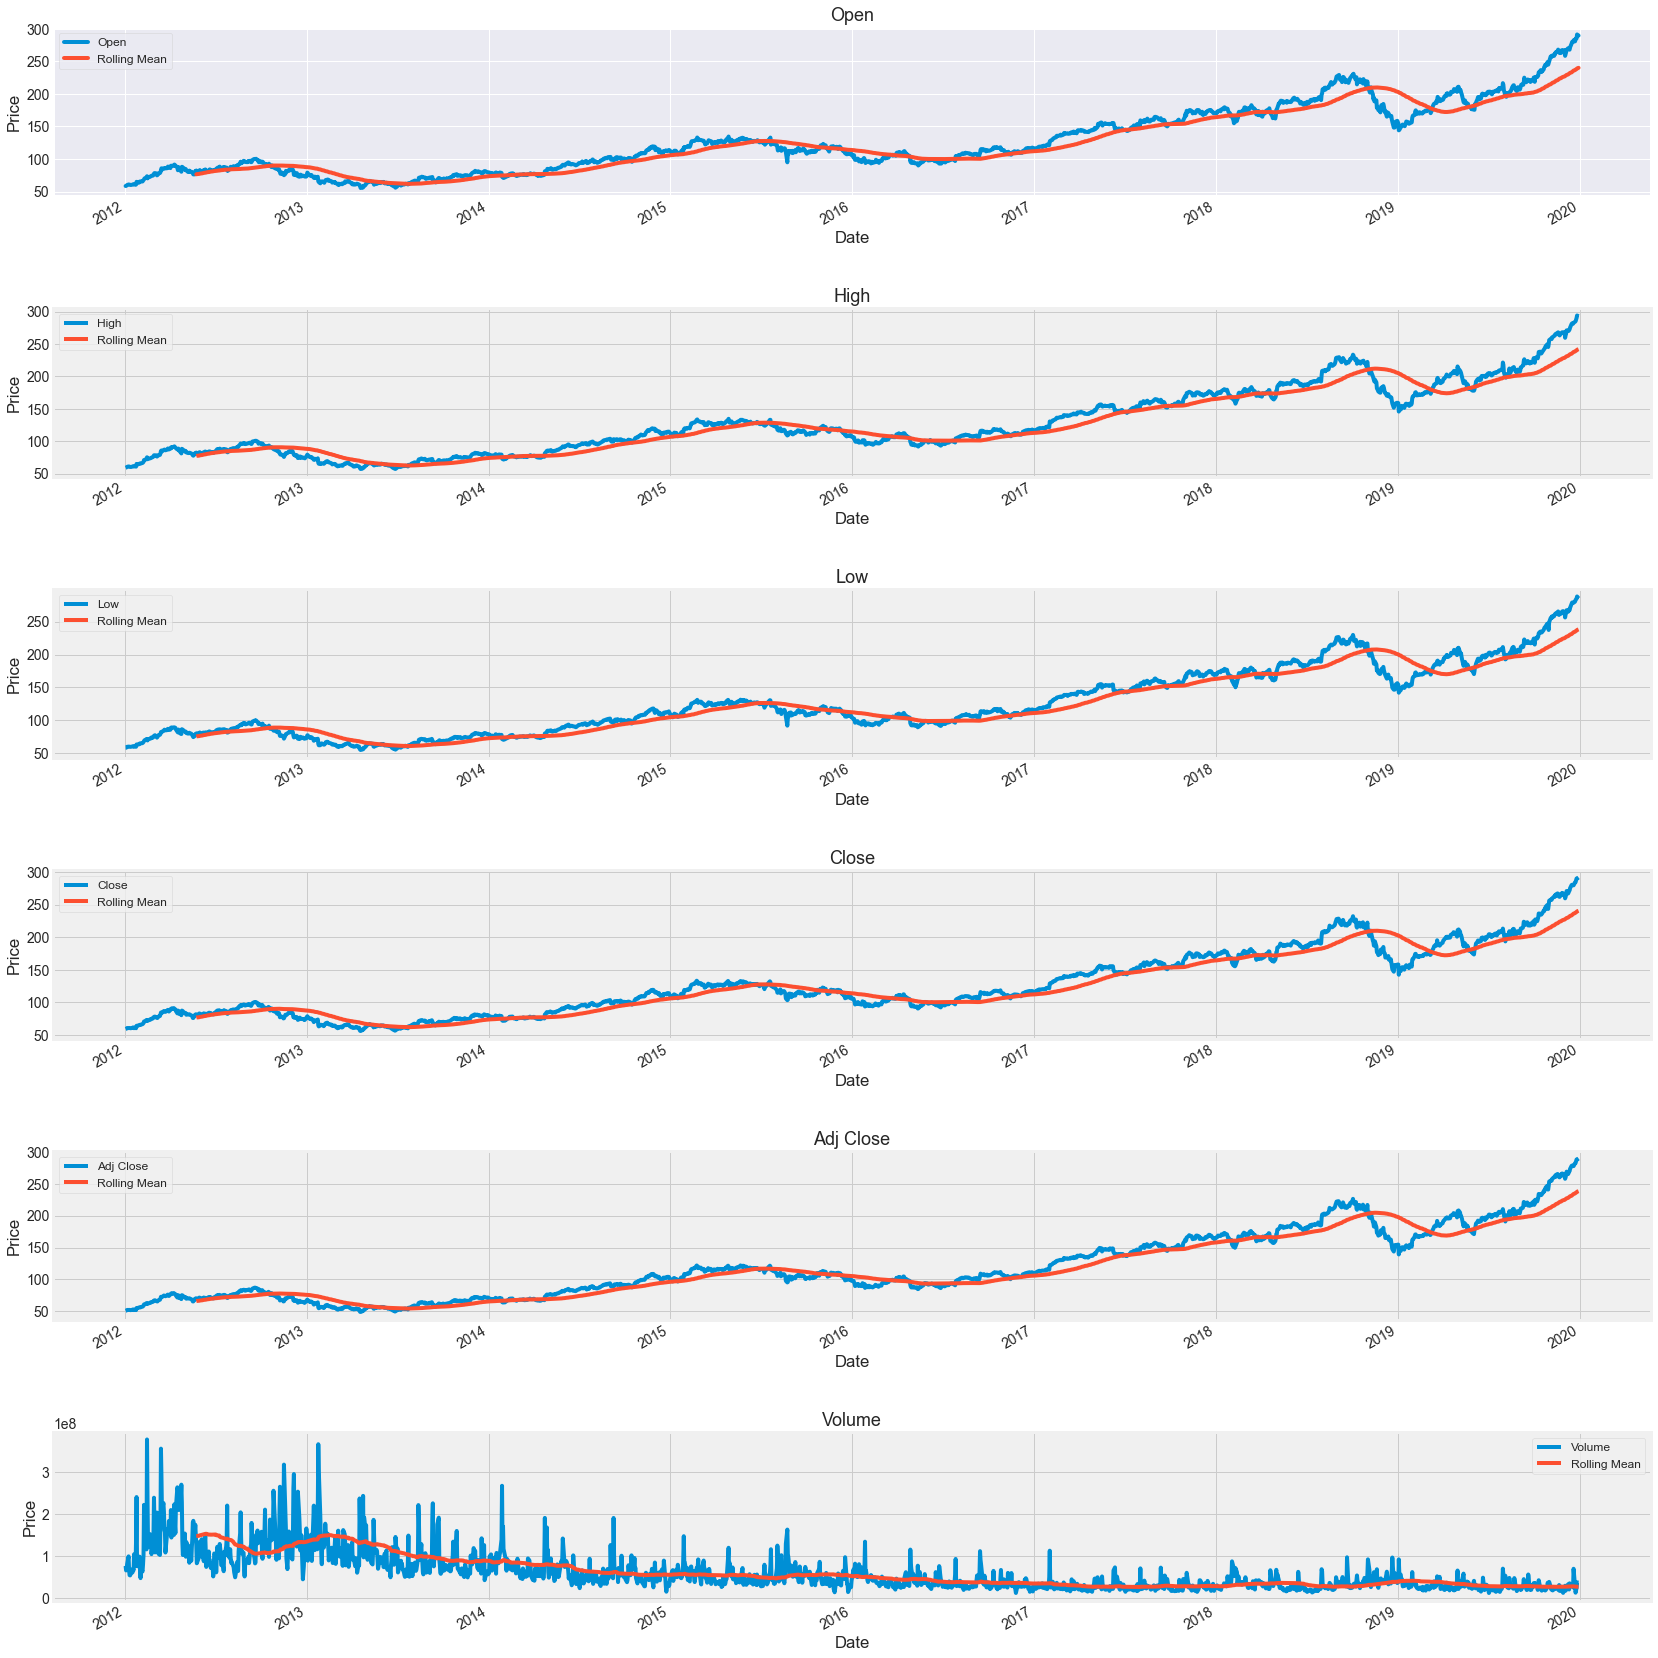

In [270]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')
fig.tight_layout(pad=3.0)

plt.show()

In [271]:
# Feature Selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Adj Close','Volume'])

We can ignore the features like Open, Low, High, AdjClose, Volume and consider Close as our target variable because it is the final value for that particular date.

In [272]:
col_order = ['Date', 'Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Close
Date,,
2012-01-03,2012-01-03,58.747143
2012-01-04,2012-01-04,59.062859
2012-01-05,2012-01-05,59.718571
2012-01-06,2012-01-06,60.342857
2012-01-09,2012-01-09,60.247143
...,...,...
2019-12-23,2019-12-23,284.000000
2019-12-24,2019-12-24,284.269989
2019-12-26,2019-12-26,289.910004


In [273]:
## Resampling
monthly_mean = data_feature_selected['Close'].resample('M').mean()

In [274]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2012-01-31,61.225428
2012-02-29,71.081572
2012-03-31,82.501104
2012-04-30,86.571857
2012-05-31,80.667597
...,...
2019-08-31,204.957728
2019-09-30,217.994999
2019-10-31,235.286521


In [275]:
close_data = pd.DataFrame(data['Close'])
close_data.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


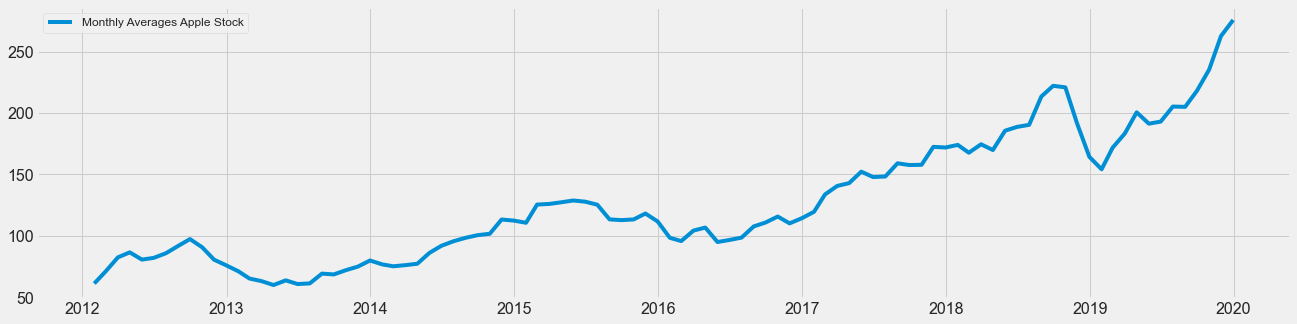

In [276]:
fig = plt.figure(figsize=(20,5))
plt.plot(monthly_data['Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [277]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,61.225428,2012,January,Tuesday,1
2012-02-29,71.081572,2012,February,Wednesday,1
2012-03-31,82.501104,2012,March,Saturday,1
2012-04-30,86.571857,2012,April,Monday,2
2012-05-31,80.667597,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,204.957728,2019,August,Saturday,3
2019-09-30,217.994999,2019,September,Monday,3
2019-10-31,235.286521,2019,October,Thursday,4


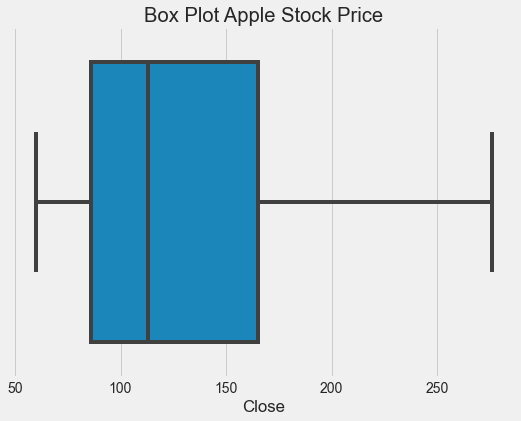

In [278]:
# Box Plot
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

The Distribution in boxplot shows it is Right Skewed

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

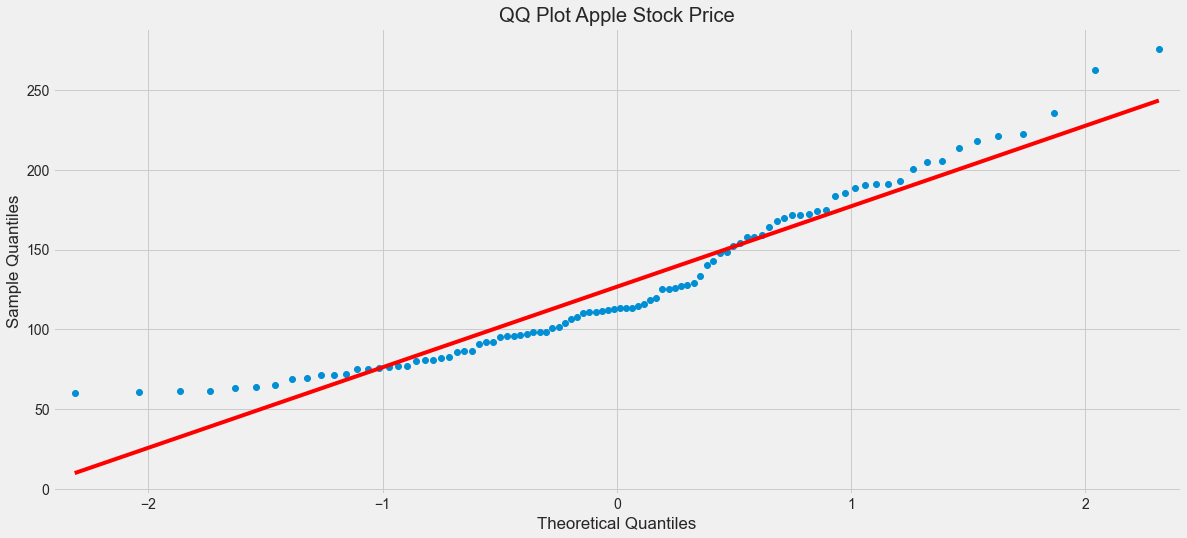

In [279]:
#QQ Plot
from statsmodels.graphics.gofplots import qqplot as qq
qq_plot = qq(monthly_data['Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

The above QQ plot shows extent of both right and left skews

In [280]:
# Skewness & Kurtosis
print('Skewness of Distribution is ',monthly_data['Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Close'].kurtosis())

Skewness of Distribution is  0.7849532325825652
Kurtosis of Distribution is  -0.1020977341875402


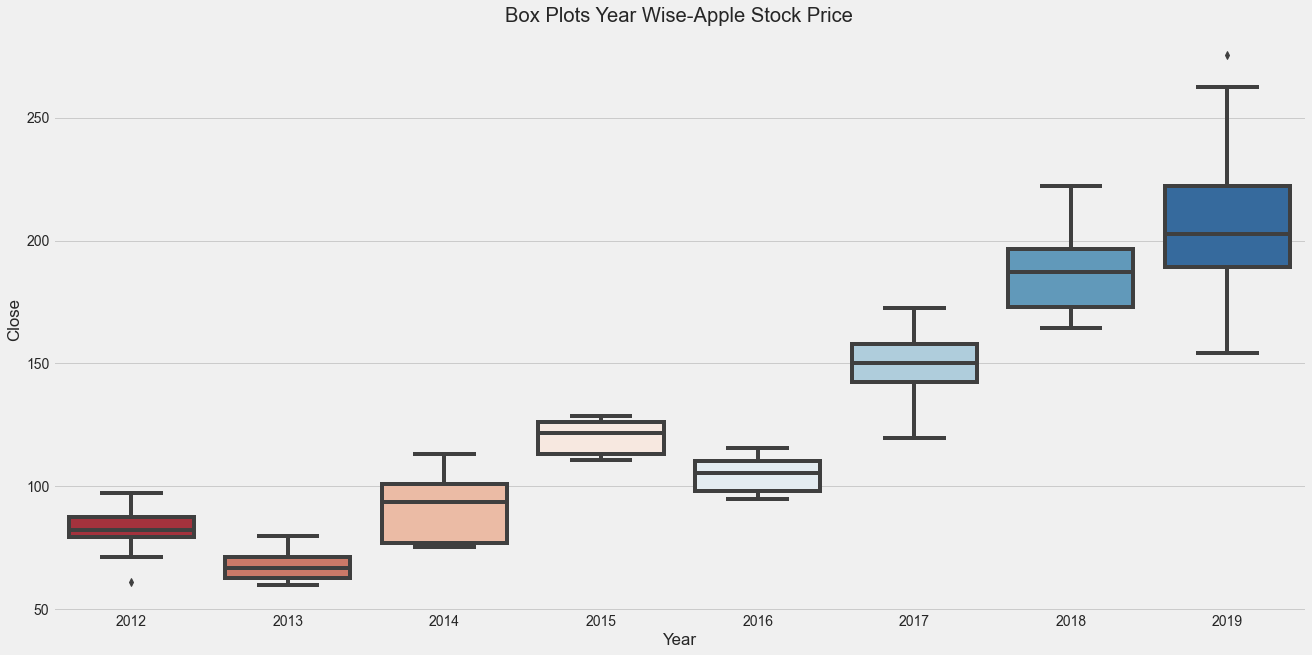

In [281]:
#Boxplots for everyyear in data
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

The above boxplots shows there are Outliers present in Year 2012 and 2019
The year 2019 is most volatile among all years
We can see the Upward Rising Trend

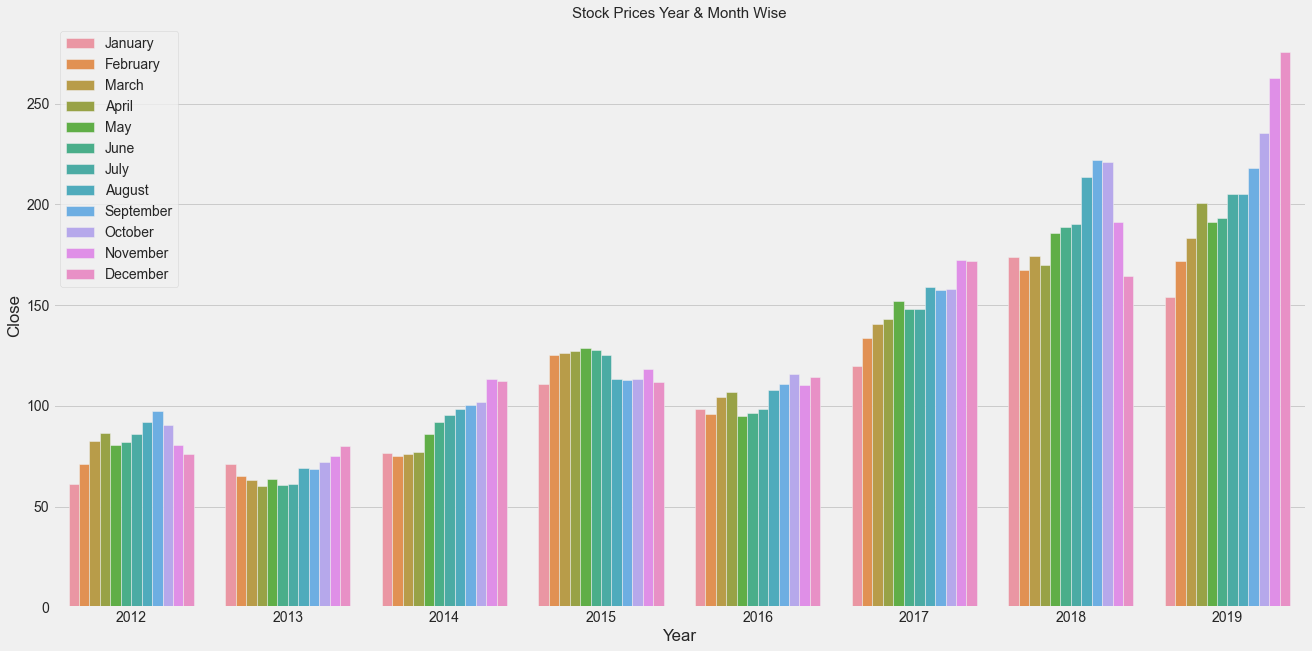

In [282]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

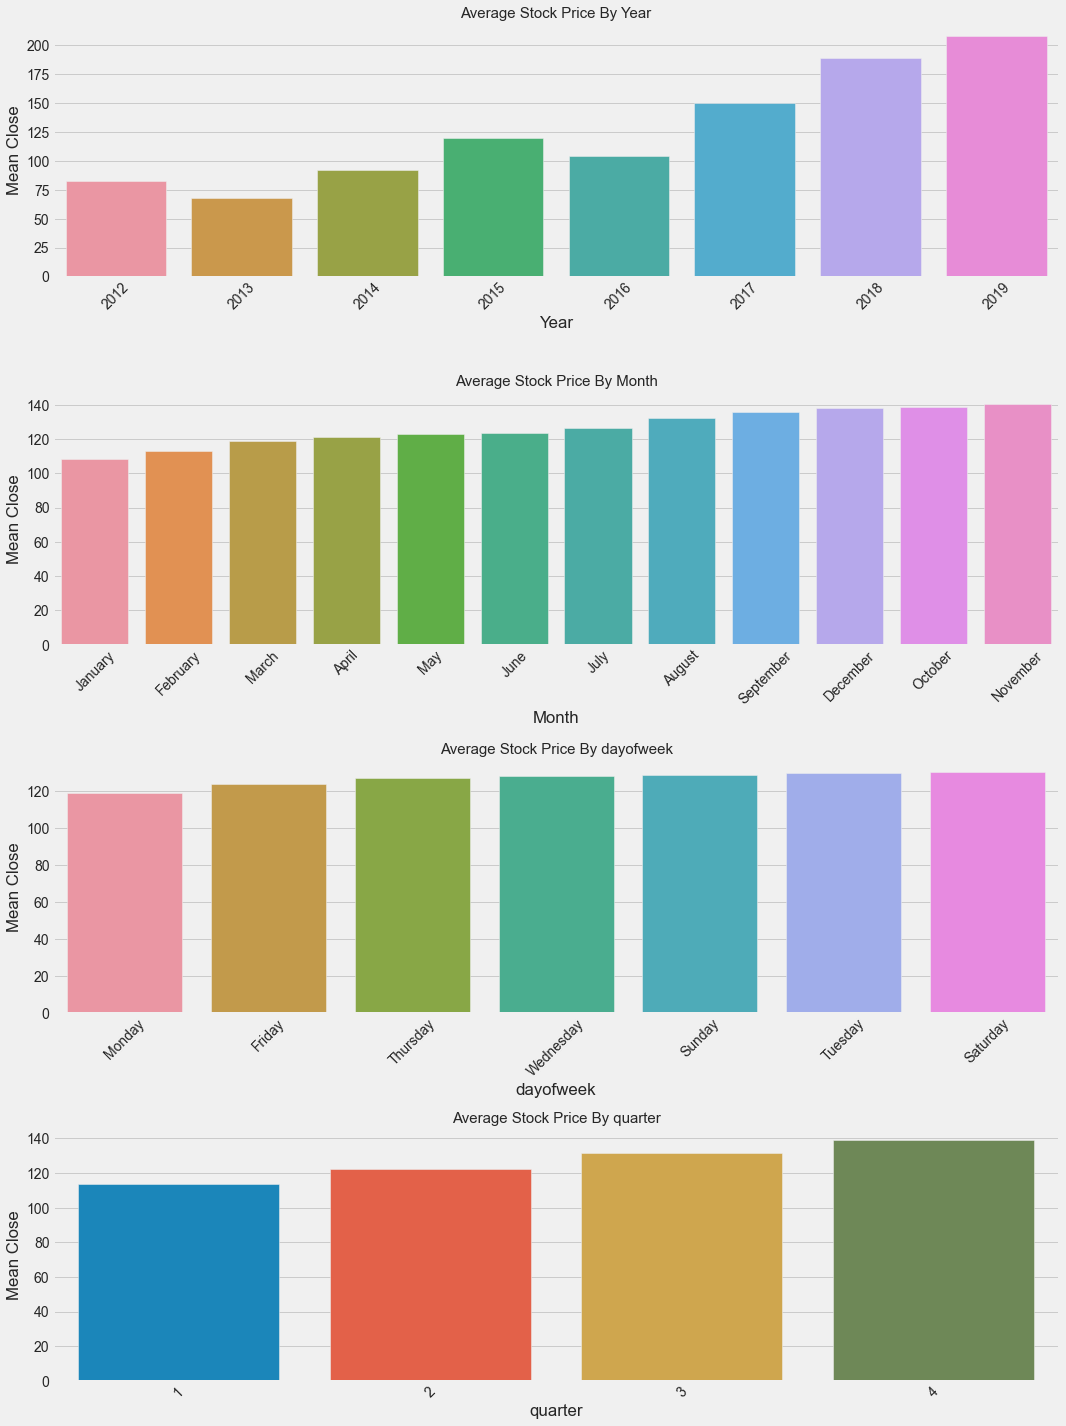

In [283]:
fig = plt.figure(figsize=(15,20))
fig.set_size_inches(15,20)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

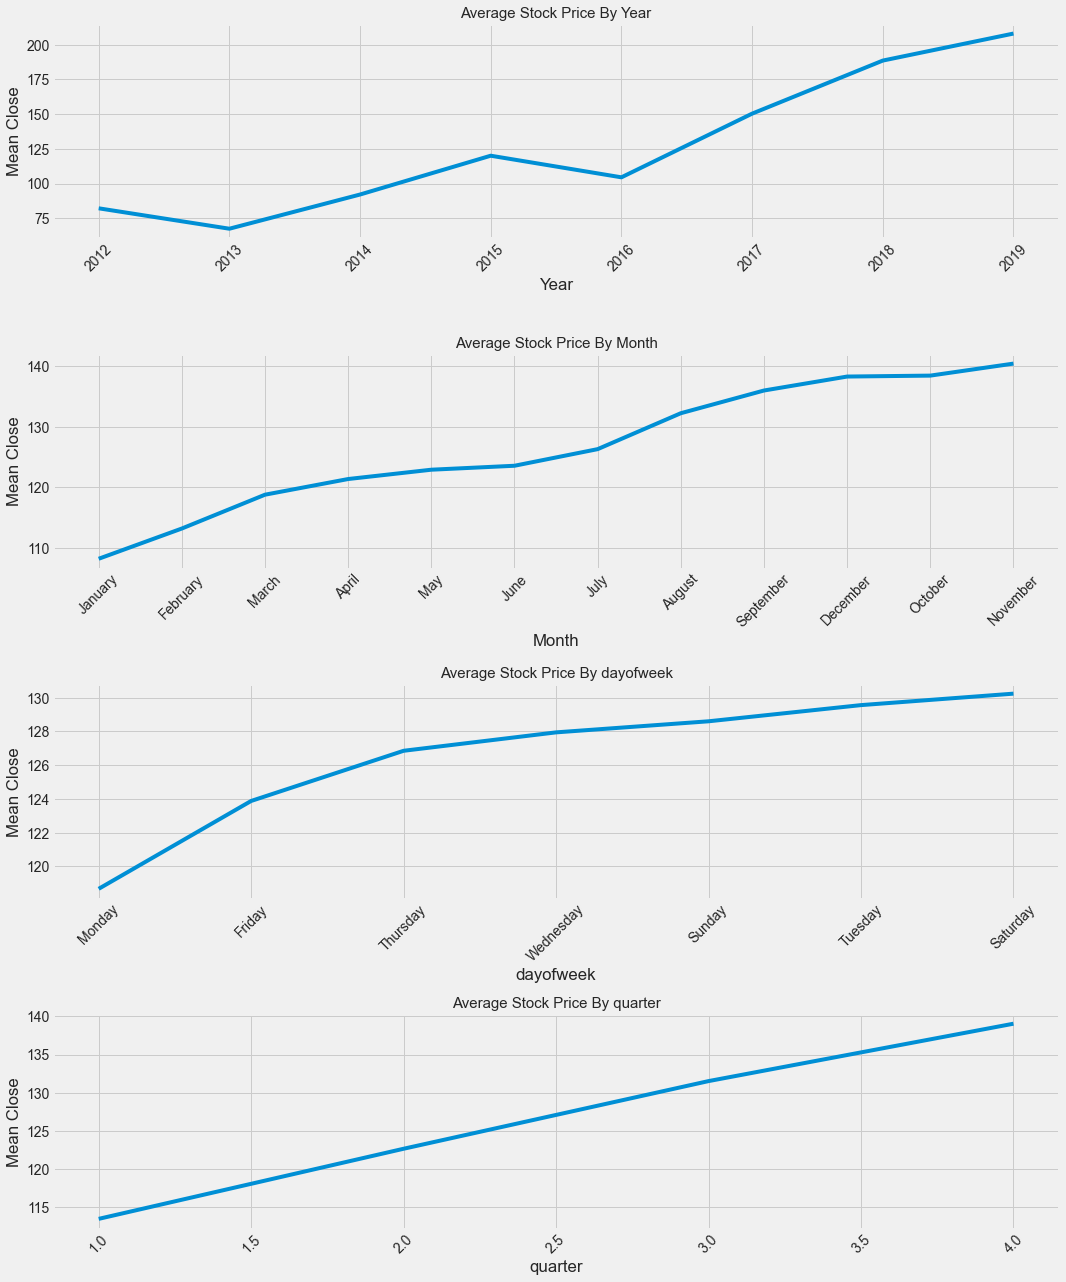

In [284]:
fig = plt.figure(figsize=(15,18))
fig.set_size_inches(15,18)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.lineplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

From the above plots, 2013 and 2016 are the only years where Mean price is lower than previous Year.
The Average Stock Price is lower at start of the week in comparision to the end of the week.
The Average Price is Highest in the Month of November.
Quarter4 is the best for Apple according to average stock price.

<Figure size 1440x1152 with 0 Axes>

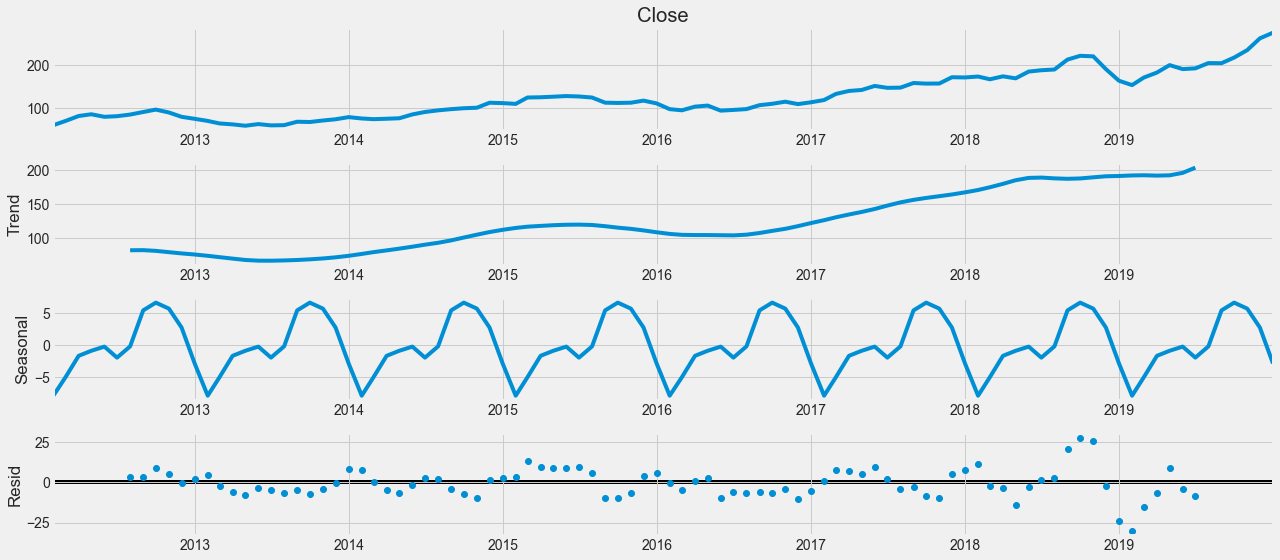

In [285]:
##Decomposition
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

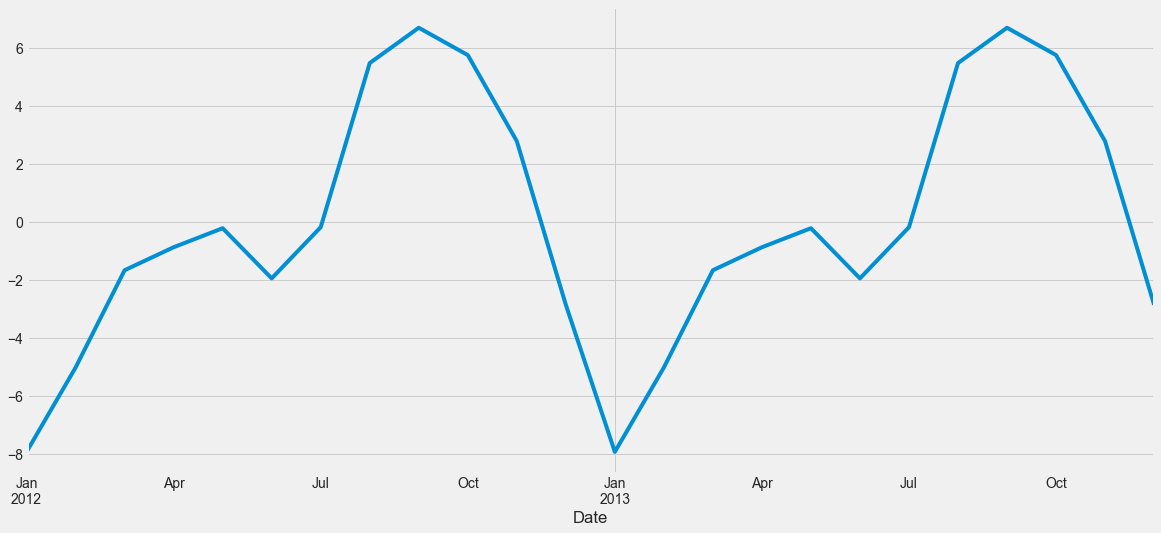

<Figure size 576x576 with 0 Axes>

In [286]:
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

From decompostion,we can see the
Trend : Overall there is an Upward Trend
Seasonality :we can see that upward and downward cycles in the plots,so there is seasonality.
Stationarity:The given Time Series is Non-Stationary because it didn't have constant mean,constant variance.

Text(0.5, 0, 'Lags')

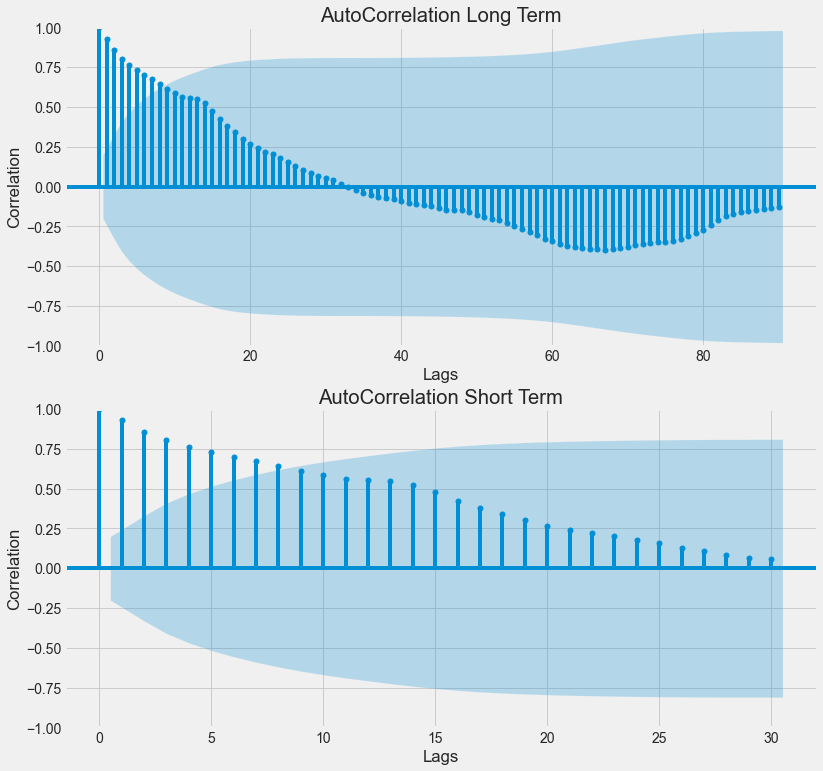

In [287]:
# ACF Plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

From the above ACF Plot,we can see the Slow Decay of correlation values which indicates the series is Non-stationary.

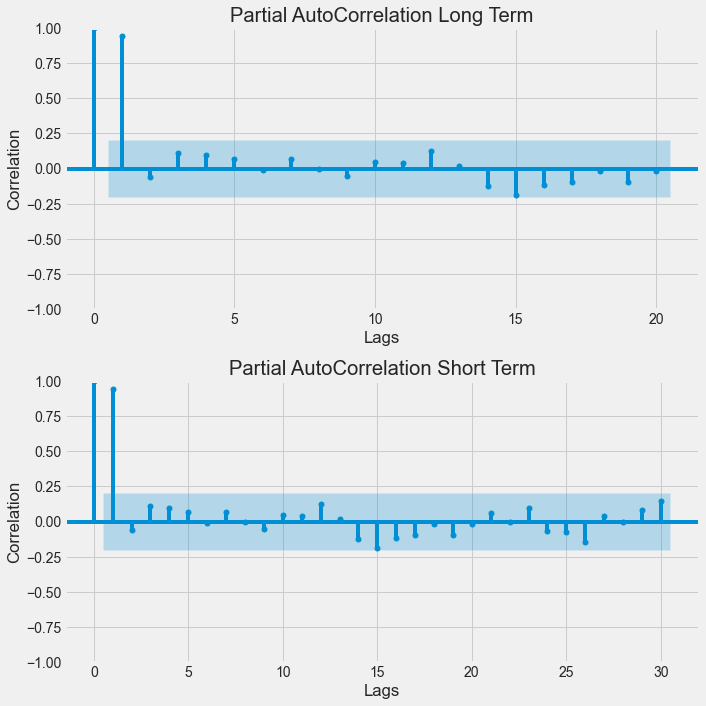

In [288]:
# PACF Plots
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Close'],ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

From the above PACF plot,there is a Sudden Decay at lag -1

In [289]:
##Stationarity Test of Time Series Using Augmented Dickey-Fuller(ADF) Test
from statsmodels.tsa.stattools import adfuller

In [290]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [291]:
ad_fuller_func(monthly_data['Close'])

ADF Statistic: 0.512110
p-value: 0.985237
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)
Statistically verified by ADF Test

In [292]:
##Transformations To Make Series Stationary

In [293]:
##Differencing By 1
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)

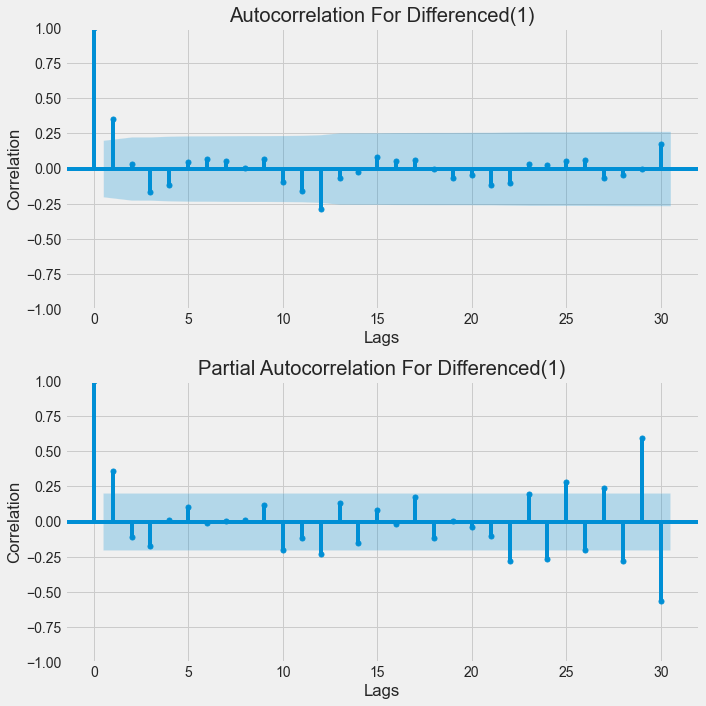

In [294]:
##ACF and PACF plots after transforming series into Stationary
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

From the above ACF and PACF plots, we can confirm that Differencing once has transformed time series into Stationary.

# MODELLING & FORECASTING

In [295]:
#splitting the data
train_data = close_data.loc[:'2017-12-29']
test_data = close_data.loc['2018-01-02':]
train_data

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2017-12-22,175.009995
2017-12-26,170.570007
2017-12-27,170.600006


im splitting the first 6 years into training data and the final year as the testing data.

In [296]:
print(len(train_data))
print(len(test_data))

1509
502


# ARIMA Model

In [297]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

From the Grid Search to Select Parameters especially for Seasonal Component of the Time Series.
The p value (AR)derived by the PACF plot
The q value (MA) derived by the ACF Plot
The d value (Differencing) derived by differencing and observing stationarity.

In [298]:
model_arima = ARIMA(close_data,order=(2,1,2))
arima_fit  = model_arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2011
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4364.586
Date:                Thu, 16 Feb 2023   AIC                           8739.171
Time:                        14:31:15   BIC                           8767.201
Sample:                             0   HQIC                          8749.460
                               - 2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2297      0.003    428.385      0.000       1.224       1.235
ar.L2         -0.9971      0.003   -377.635      0.000      -1.002      -0.992
ma.L1         -1.2372      0.003   -389.885      0.000      -1.243      -1.231
ma.L2          0.9968      0.003    308.509      0.000       0.990       1.003
sigma2         4.5242      0.076     59.268      0.000       4.375       4.674
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              3182.82
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               5.14   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [299]:
prediction = pd.DataFrame(arima_fit.predict(typ = 'levels'))
prediction.columns=['Close']
prediction.tail()

,Close
Date,
2019-12-23,279.740906
2019-12-24,284.574399
2019-12-26,284.677107
2019-12-27,289.799080
2019-12-30,289.255818


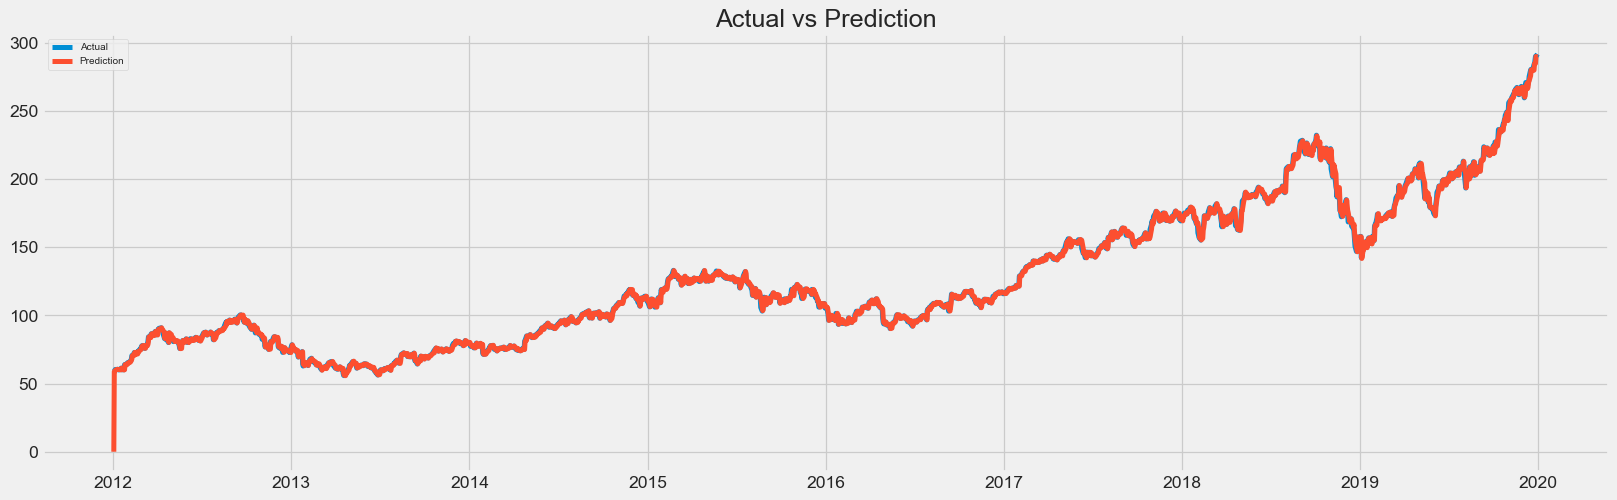

In [300]:
plt.figure(figsize=(20,6), dpi=90)
plt.plot(close_data['Close'], label='Actual')
plt.plot(prediction, label='Prediction')
plt.title('Actual vs Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

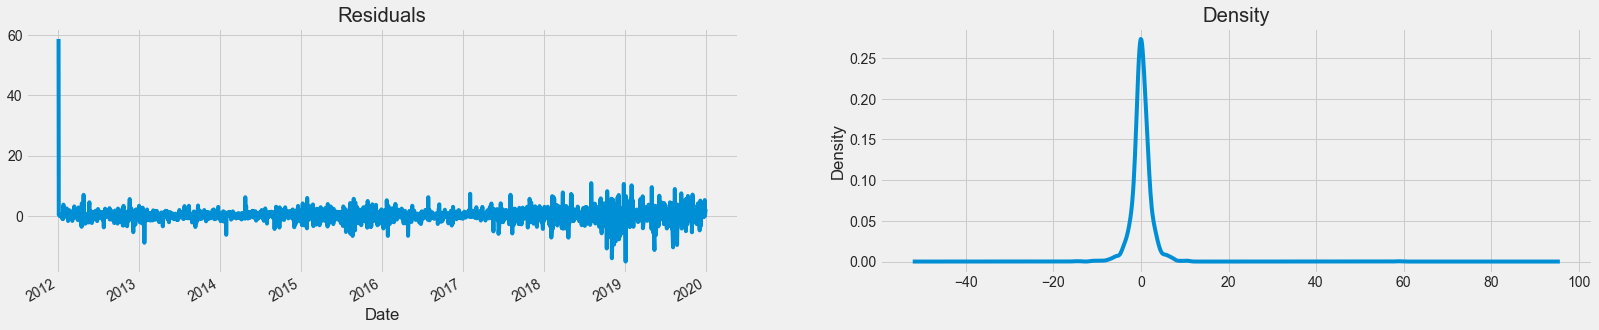

In [301]:
# Residual plot
residuals = arima_fit.resid
fig, axs = plt.subplots(1,2,figsize=(25,5))
residuals.plot(title="Residuals", ax=axs[0])
residuals.plot(kind='kde', title='Density', ax=axs[1])
plt.show()

In [302]:
model_arima = ARIMA(train_data,order=(2,1,2))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2790.579
Date:                Thu, 16 Feb 2023   AIC                           5591.158
Time:                        14:31:17   BIC                           5617.751
Sample:                             0   HQIC                          5601.062
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5321      0.021     25.480      0.000       0.491       0.573
ar.L2         -0.9782      0.020    -50.087      0.000      -1.016      -0.940
ma.L1         -0.5338      0.027    -19.914      0.000      -0.586      -0.481
ma.L2          0.9621      0.025     38.198      0.000       0.913       1.012
sigma2         2.3710      0.052     45.299      0.000       2.268       2.474
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               847.67
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [303]:
test_pred = pd.DataFrame(result.predict(len(train_data),len(train_data)+501,typ='levels'))
test_pred.index = test_data.index
test_pred.columns=test_data.columns
test_pred

,Close
Date,
2018-01-02,169.450621
2018-01-03,169.413745
2018-01-04,169.178304
2018-01-05,169.089097
2018-01-08,169.271942
...,...
2019-12-23,169.275295
2019-12-24,169.276295
2019-12-26,169.276673


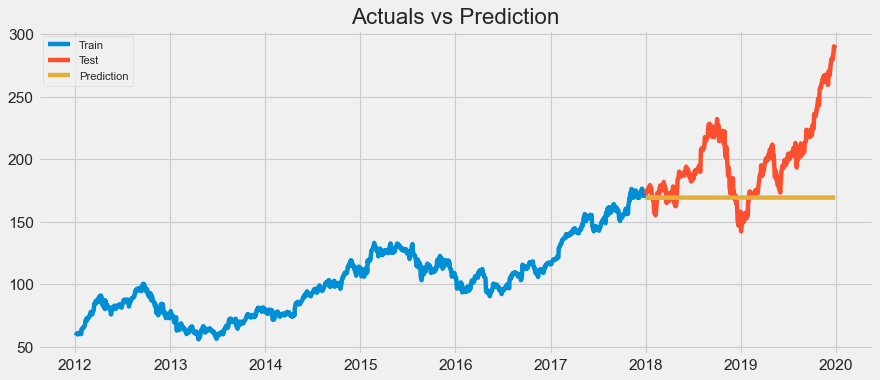

In [304]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [305]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

mse_arima = mean_squared_error(test_pred.Close,test_data.Close)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.round(mean_absolute_percentage_error(test_pred.Close,test_data.Close),3)

print('\n MSE = ',mse_arima)
print('\n RMSE = ',rmse_arima)
print('\n MAPE = ', mape_arima)


 MSE =  1735.1852224301988

 RMSE =  41.65555452073827

 MAPE =  0.186


# Seasonal ARIMA Model

In [306]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [307]:
model_sarima = sm.tsa.SARIMAX(train_data,order=(2,1,2),seasonal_order=(1,1,0,57),enforce_invertibility=False,enforce_stationarity=False)
sarima_fit = model_sarima.fit()
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 57)   Log Likelihood               -2830.019
Date:                             Thu, 16 Feb 2023   AIC                           5672.038
Time:                                     14:31:50   BIC                           5703.468
Sample:                                          0   HQIC                          5683.790
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2448      0.340      0.720      0.472      -0.422       0.912
ar.L2         -0.2245      0.323     -0.695      0.487      -0.858       0.408
ma.L1         -0.2082      0.346     -0.602      0.547      -0.886       0.470
ma.L2          0.1527      0.331      0.461      0.645      -0.496       0.802
ar.S.L57      -0.5207      0.018    -28.626      0.000      -0.556      -0.485
sigma2         3.4152      0.096     35.722      0.000       3.228       3.603
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               175.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Error')

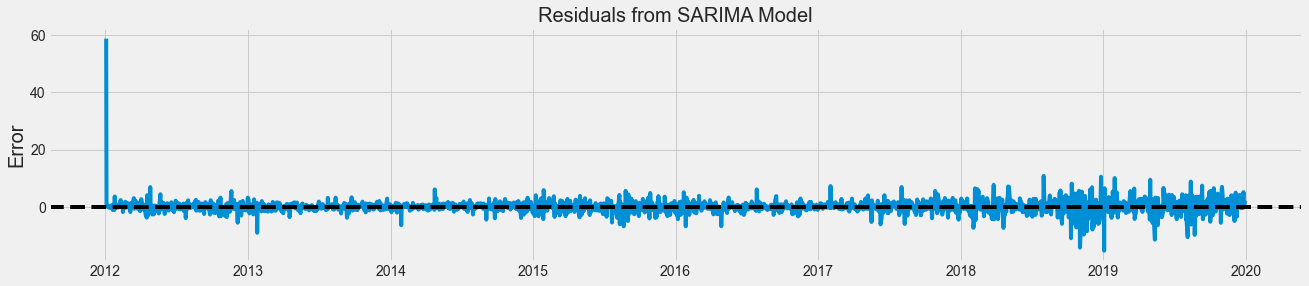

In [308]:
#Residuals_plot
plt.figure(figsize=(20,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=20)

In [309]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2.4929665103270153


In [310]:
test_prediction = pd.DataFrame(sarima_fit.predict(len(train_data),len(train_data)+501,typ='levels'))
test_prediction.index = test_data.index
test_prediction

,predicted_mean
Date,
2018-01-02,168.783387
2018-01-03,169.189948
2018-01-04,169.933433
2018-01-05,170.731433
2018-01-08,172.474497
...,...
2019-12-23,263.603141
2019-12-24,263.656566
2019-12-26,264.910060


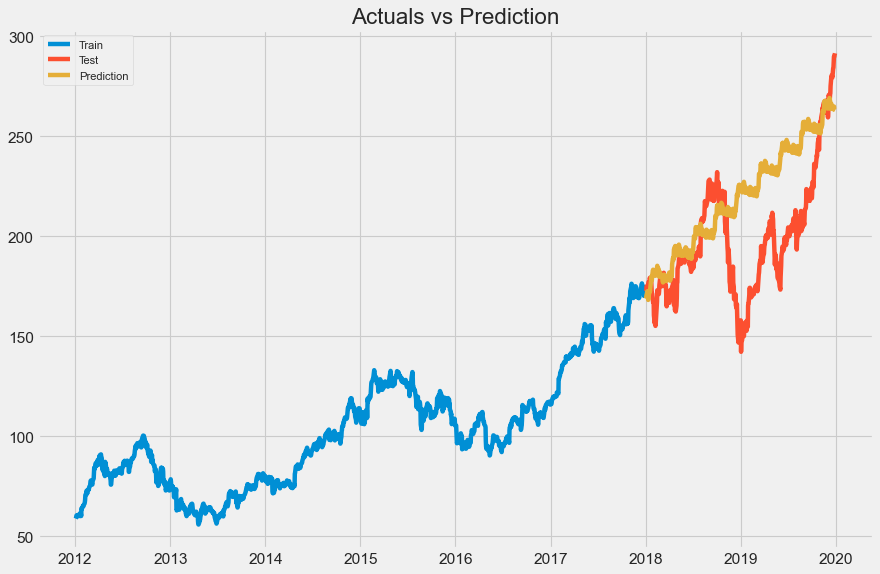

In [311]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [312]:
mse_sarimax = mean_squared_error(test_pred,test_data)
rmse_sarimax= np.round(np.sqrt(mean_squared_error(test_data,test_prediction)),2)
mape_sarimax = np.round(mean_absolute_percentage_error(test_prediction,test_data),3)

In [313]:
print('\n MSE = ',mse_sarimax)
print('\n RMSE = ',rmse_sarimax)
print('\n MAPE = ', mape_sarimax)


 MSE =  1735.1852224301988

 RMSE =  32.63

 MAPE =  0.113


In [321]:
## Final_Metrics table
cols = ['Model_Name', 'RMSE', 'MAPE']
Final_Metrics = pd.DataFrame(columns = cols)
def appending(x):
    Final_Metrics.append(x,ignore_index=True)

In [322]:
arima = pd.Series({'Model_Name': "ARIMA Model",
                     'RMSE': rmse_arima,
                     'MAPE':mape_arima
                   })
Final_Metrics = Final_Metrics.append(arima,ignore_index=True)

In [323]:
sarimax = pd.Series({'Model_Name': "Seasonal ARIMA Model",
                     'RMSE': rmse_sarimax,
                     'MAPE':mape_sarimax
                   })
Final_Metrics = Final_Metrics.append(sarimax,ignore_index=True)

In [324]:
Final_Metrics

,Model_Name,RMSE,MAPE
0,ARIMA Model,41.655555,0.186
1,Seasonal ARIMA Model,32.63,0.113


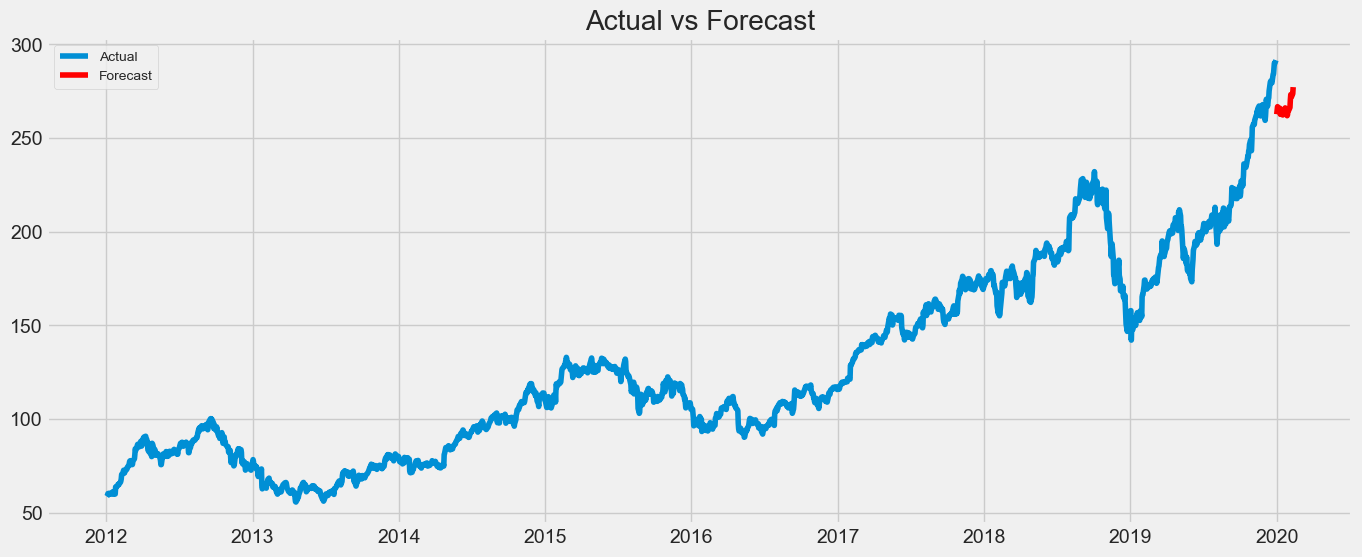

In [319]:
# Forecasting for next 30 days using sarima model

forecast = sarima_fit.predict(len(close_data),len(close_data)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Close']
forecast_df


# Set appropriate date as index for plotting forecast data
datetime = pd.date_range('2020-01-01', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['Date'])

data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

plt.figure(figsize=(15,6), dpi=100)
plt.plot(close_data, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()